In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [9]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler#uses z scores

In [11]:
z=StandardScaler()

In [12]:
X=z.fit_transform(df)

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=3)

In [16]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_

array([5.56722458, 2.51118402, 1.45424413])

In [47]:
X.shape[1]

14

In [48]:
for p in range(2,X.shape[1]):
    pca=PCA(n_components=p)
    pca.fit(X)
    max_var=np.cumsum(pca.explained_variance_ratio_)[-1]
    if max_var>0.95:
        print(p)
        break

10


In [23]:
pca=PCA(n_components=3)#90% theshold
pc=pca.fit_transform(X)

In [24]:
pc.shape

(178, 3)

In [25]:
pc1=pc[:,0]
pc1.shape

(178,)

In [27]:
pc2=pc[:,1]
pc2.shape

(178,)

In [30]:
pc1[1]

-2.5288580618463667

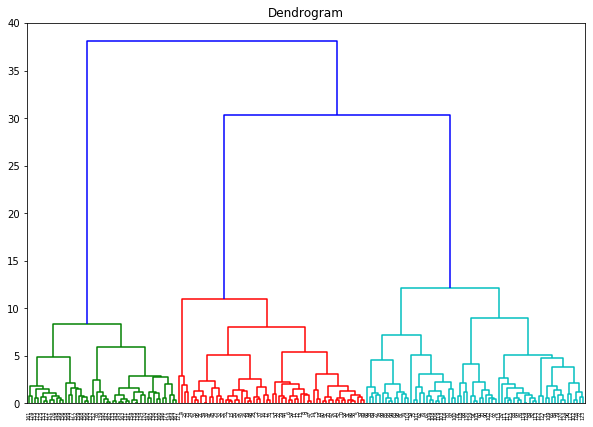

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(pc,method='ward'))#from Dendrogram clusters=3

In [38]:
from sklearn.cluster import KMeans

In [52]:
km=KMeans(n_clusters=3)

In [53]:
km.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
k=[2,3,4,5,6,7,8]
inertia=[]
for c in k:
    km=KMeans(n_clusters=c)
    km.fit(pc)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Average Distance from Centroid')

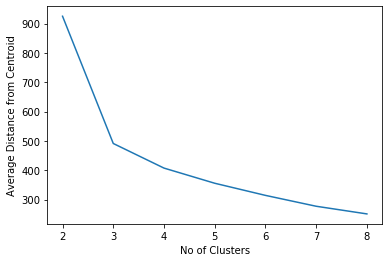

In [45]:
plt.plot(k,inertia)
plt.xlabel("No of Clusters")
plt.ylabel("Average Distance from Centroid")#Elbow Curve gives 3 clusters as optimal

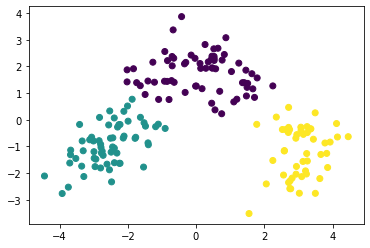

In [55]:
plt.scatter(pc[:,0],pc[:,1],c=km.labels_)